<a href="https://colab.research.google.com/github/MRazin172/Practice_Exercise/blob/main/2348534_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
data=pd.read_csv('/content/data - data.csv')

In [17]:
print(data.head())
print(data.describe())

              date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02-05-2014 0:00   313000.0         3       1.50         1340      7912   
1  02-05-2014 0:00  2384000.0         5       2.50         3650      9050   
2  02-05-2014 0:00   342000.0         3       2.00         1930     11947   
3  02-05-2014 0:00   420000.0         3       2.25         2000      8030   
4  02-05-2014 0:00   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip

In [32]:
#no nulls
data.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
street              0
city                0
statezip            0
country             0
yrbuilt_bins       22
Sqft Above Bins     0
dtype: int64

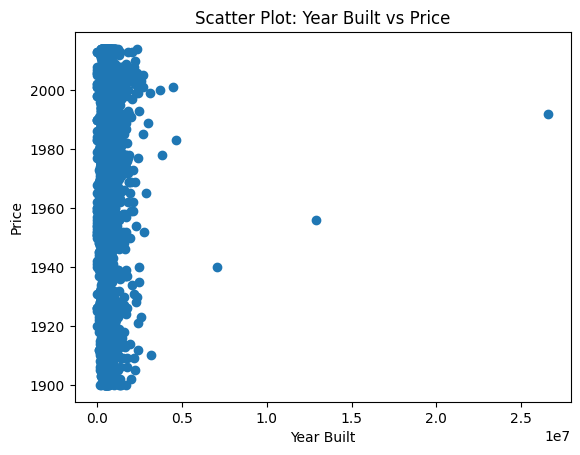

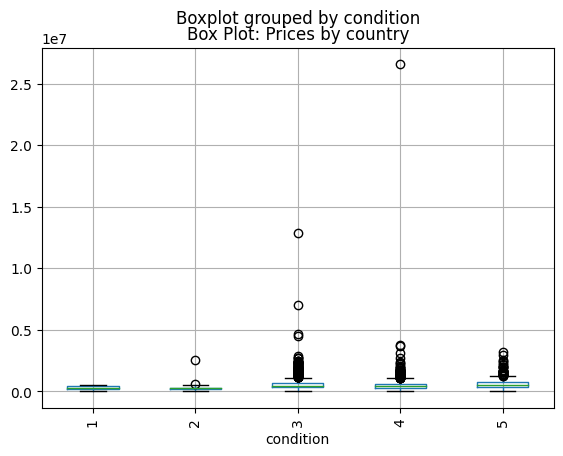

In [23]:
plt.scatter(data['price'], data['yr_built'])
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Scatter Plot: Year Built vs Price')
plt.show()

data.boxplot(column='price', by='condition', rot=90)
plt.title('Box Plot: Prices by country')
plt.show()


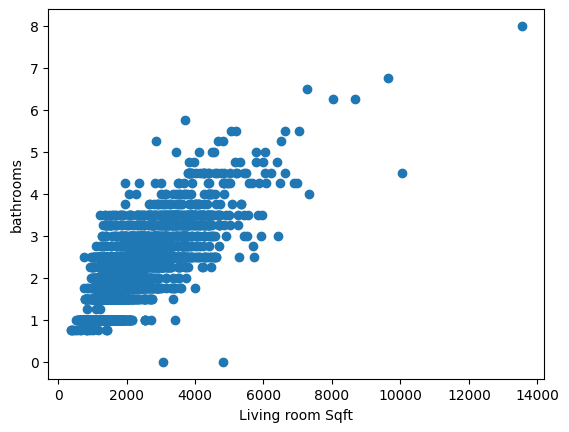

In [33]:
plt.scatter(data['sqft_living'],data['bathrooms'])
plt.xlabel('Living room Sqft')
plt.ylabel('bathrooms')
plt.show()

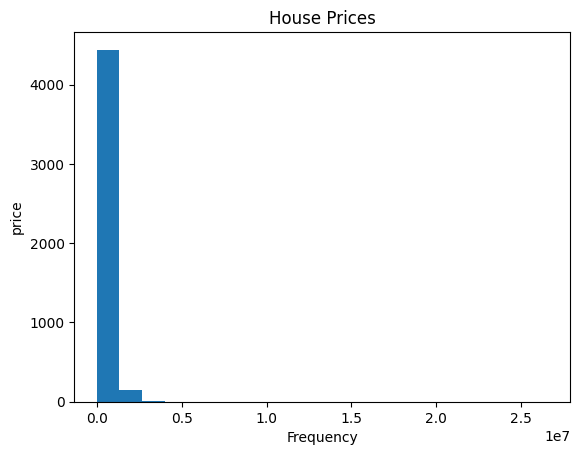

In [18]:
plt.hist(data['price'], bins=20)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('House Prices')
plt.show()

<ipython-input-35-527cf14db881>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


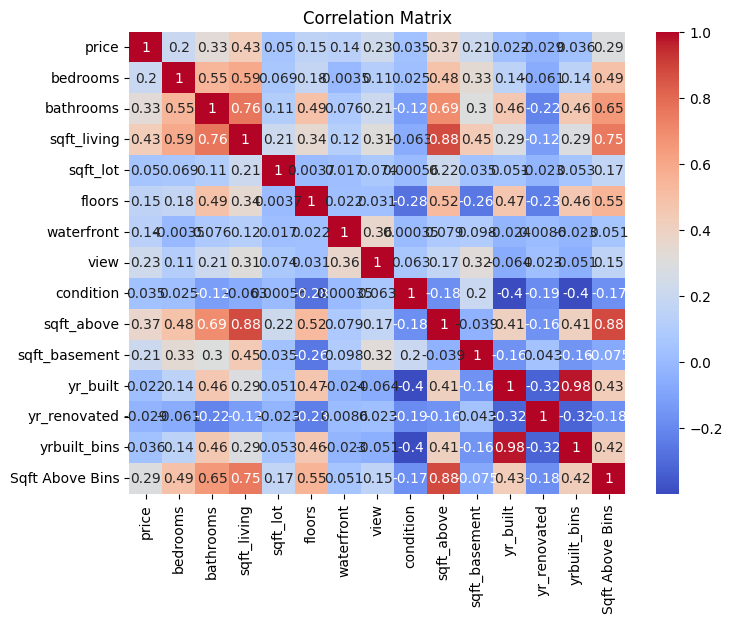

In [35]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [27]:
numberofbins = 5

yrbuilt_bins = np.linspace(data['yr_built'].min(), data['yr_built'].max(), numberofbins + 1)

data['yrbuilt_bins'] = pd.cut(data['yr_built'], bins=yrbuilt_bins, labels=False)
print(data[['yr_built', 'yrbuilt_bins']].head(10))


   yr_built  yrbuilt_bins
0      1955           2.0
1      1921           0.0
2      1966           2.0
3      1963           2.0
4      1976           3.0
5      1938           1.0
6      1976           3.0
7      1989           3.0
8      1985           3.0
9      1945           1.0


In [29]:
num_bins=5
sqft_above_bins = pd.qcut(data['sqft_above'], num_bins, labels=False)
data['Sqft Above Bins'] = sqft_above_bins
print(data[['sqft_above', 'Sqft Above Bins']].head(10))


   sqft_above  Sqft Above Bins
0        1340                1
1        3370                4
2        1930                3
3        1000                0
4        1140                1
5         880                0
6        1350                1
7        2710                4
8        1570                2
9        1520                2


In [36]:
from sklearn.preprocessing import StandardScaler
price = data.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
normalized_data = scaler.fit_transform(price)
normalized_df = pd.DataFrame(data=normalized_data, columns=price.columns)
data[price.columns] = normalized_df

# The data now contains Z-score normalized values for price


In [38]:
data.head

<bound method NDFrame.head of                  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     02-05-2014 0:00 -0.423864 -0.441122  -0.843204    -0.829971 -0.193434   
1     02-05-2014 0:00  3.249598  1.759705   0.432802     1.568528 -0.161718   
2     02-05-2014 0:00 -0.372424 -0.441122  -0.205201    -0.217367 -0.080978   
3     02-05-2014 0:00 -0.234071 -0.441122   0.113800    -0.144686 -0.190145   
4     02-05-2014 0:00 -0.003482  0.659291   0.432802    -0.206984 -0.121306   
...               ...       ...       ...        ...          ...       ...   
4595  09-07-2014 0:00 -0.432437 -0.441122  -0.524202    -0.653458 -0.236689   
4596  09-07-2014 0:00 -0.031271 -0.441122   0.432802    -0.705374 -0.202882   
4597  09-07-2014 0:00 -0.239562 -0.441122   0.432802     0.904009 -0.218462   
4598  10-07-2014 0:00 -0.618268  0.659291  -0.205201    -0.051238 -0.229164   
4599  10-07-2014 0:00 -0.587759 -0.441122   0.432802    -0.674224 -0.188139   

        floors  water